In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv ')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

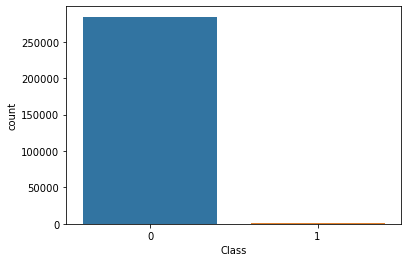

In [8]:
sns.countplot(df['Class'])

In [9]:
#df = df.drop(['Time','Amount','Class'],axis=1)

<AxesSubplot:xlabel='Time', ylabel='Density'>

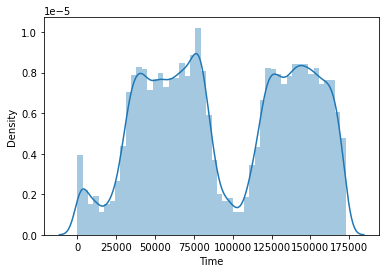

In [10]:
sns.distplot(df['Time'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

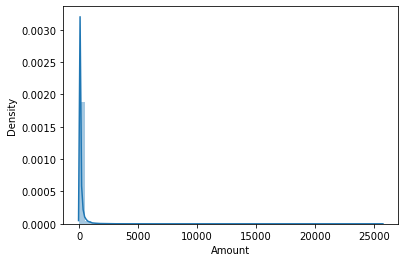

In [11]:
sns.distplot(df['Amount'])

<AxesSubplot:>

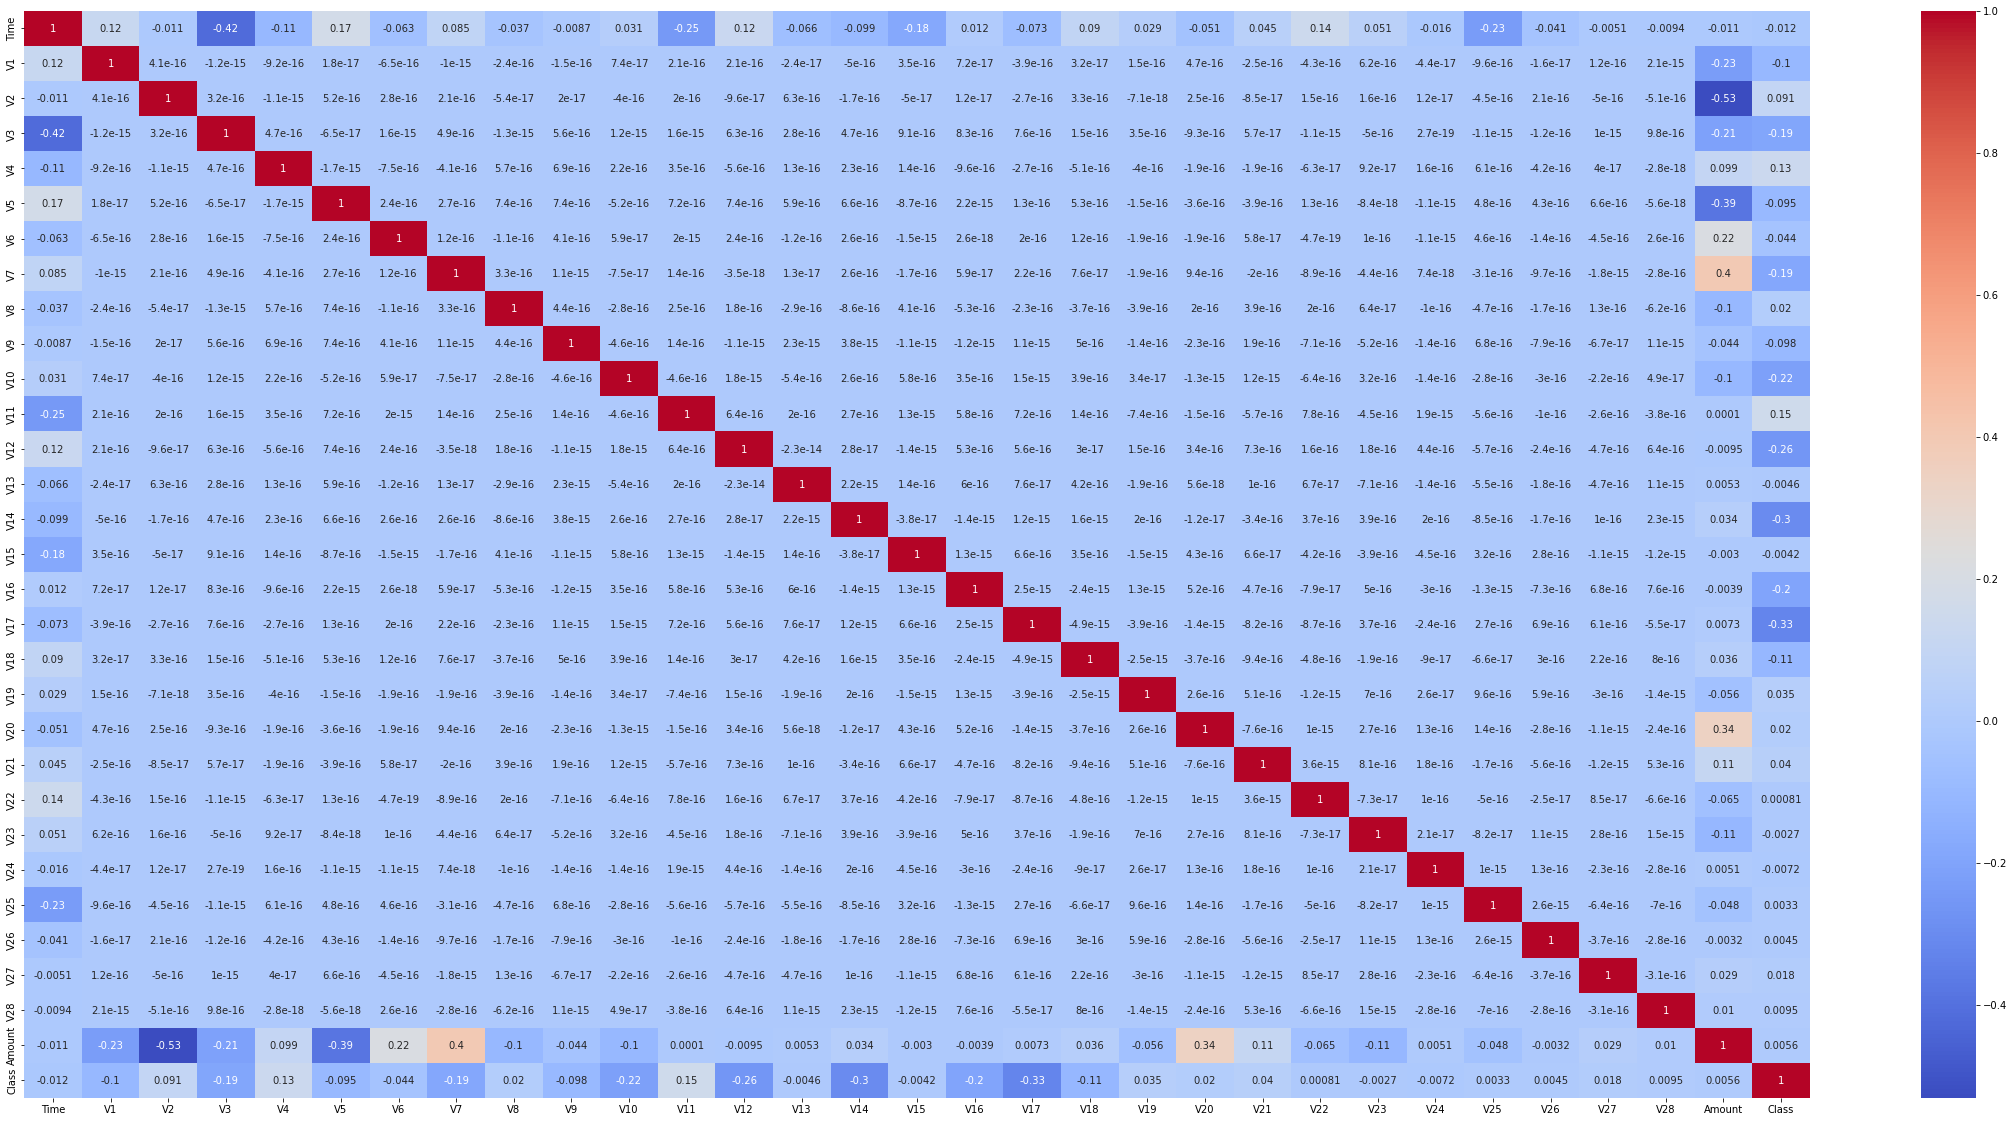

In [12]:
corr = df.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
x = df.drop('Class', axis=1)

In [14]:
y = df['Class']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
x_scale = ss.fit_transform(x)

In [18]:
x_scale

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [19]:
x_scale[-1]#last one

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.30,random_state=101,stratify=y)

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
lr_pred = lr.predict(x_test)

In [26]:
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.63      0.74       148

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
print(confusion_matrix(y_test,lr_pred))

[[85285    10]
 [   55    93]]


In [29]:
print(accuracy_score(y_test,lr_pred))

0.9992392589211521


In [30]:
print(f1_score(y_test,lr_pred))

0.7410358565737052


# DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)

In [33]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [34]:
dtc_pred = dtc.predict(x_test)

In [35]:
dtc_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.81      0.80       148

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
print(confusion_matrix(y_test,dtc_pred))

[[85263    32]
 [   28   120]]


In [38]:
print(accuracy_score(y_test,dtc_pred))

0.9992977774656788


In [62]:
print(f1_score(y_test,dtc_pred))

0.8


# RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=1)

In [41]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [42]:
rfc_pred = rfc.predict(x_test)

In [43]:
rfc_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.78      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [45]:
print(confusion_matrix(y_test,rfc_pred))

[[85290     5]
 [   32   116]]


In [46]:
print(accuracy_score(y_test,rfc_pred))

0.9995669627705019


In [63]:
print(f1_score(y_test,rfc_pred))

0.8624535315985131


# KNeighborsClassifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
knn_pred = knn.predict(x_test)

In [51]:
knn_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.80      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [53]:
print(confusion_matrix(y_test,knn_pred))

[[85284    11]
 [   29   119]]


In [54]:
print(accuracy_score(y_test,knn_pred))

0.9995318516437859


In [64]:
print(f1_score(y_test,knn_pred))

0.8561151079136691


# XGBClassifier

In [55]:
import xgboost
from xgboost import XGBClassifier

In [56]:
xb = XGBClassifier()

In [57]:
xb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
xb_pred = xb.predict(x_test)

In [59]:
print(classification_report(y_test,xb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.84      0.89       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
print(confusion_matrix(y_test,xb_pred))

[[85287     8]
 [   24   124]]


In [61]:
print(accuracy_score(y_test,xb_pred))

0.9996254813150287


In [65]:
print(f1_score(y_test,xb_pred))

0.8857142857142858


# Class Imbalancement

<AxesSubplot:xlabel='Class', ylabel='count'>

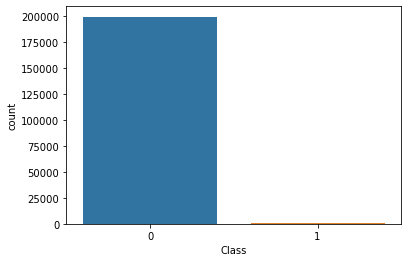

In [66]:
sns.countplot(y_train)

In [69]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote,y_smote = over_sample.fit_resample(x_train,y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

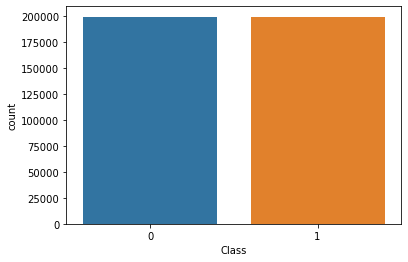

In [70]:
sns.countplot(y_smote)

In [85]:
import xgboost
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_smote,y_smote)
xb_pred = xb.predict(x_test)

In [86]:
print('Accuracy Score:',accuracy_score(y_test,xb_pred))
print('\n')
print('f1 score:' ,f1_score(y_test,xb_pred))

Accuracy Score: 0.999204147794436


f1 score: 0.7861635220125786
